Step 1: Loading Data

In [14]:
import io
import re
from datetime import datetime
import pandas as pd
import streamlit as st
from pypdf import PdfReader
import pdfplumber
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import fitz  # PyMuPDF

In [16]:
file_path = '/DraftMLResumeProject/parsed_resumes.csv'
try:
    df = pd.read_csv(file_path)
except:
    df = pd.read_csv("parsed_resumes.csv")      # manual read

In [17]:
# Print the shape of the dataset

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 4 rows and 18 columns.


In [18]:
# Display first 5 rows of Raw Data
display(df.head())

,file,pages,used_ocr,name_guess,emails,phones,linkedin,github,other_links,skills_snippet,education_snippet,char_count,hs_gpa,degree,university,programming_languages,internships_found,graduation_date
0,Anthony Franzino Resume 2025.pdf,1,False,leverage AI.,"ajfranzino1@gmail.com, jdsaliba14@gmail.com, p...","687695376, 863) 224-1745, 863) 255-2674, 863) ...",https://www.linkedin.com/in/anthony-franzino-6...,NaN,NaN,NaN,EDUCATION AUGUST 2022 - PRESENT (Graduating Fa...,2025,NaN,NaN,"UNIVERSITY OF FLORIDA, GAINESVILLE, FL",Typescript,NaN,NaN
1,Elliot Blain Computer Science Resume.pdf,2,False,"Bachelor of Science, Computer Science",njblain1@gmail.com,941) 416-7722,NaN,NaN,https://njblain1.wixsite.com/elliotblain,NaN,"Education Bachelor of Science, Computer Scienc...",3025,NaN,Bachelor of Science,"Gainesville, FL | njblain1@gmail.com | (941) 4...","C++, Java, Matlab, Python, Sql",NaN,NaN
2,Christian Schneider Resume.pdf,1,False,Efficiently manage multiple tables,Cdschneider27@gmail.com,"407)-782-8481, 734375347\n2255",https://www.linkedin.com/in/christian-schneide...,NaN,NaN,NaN,"Education Bachelor of Science, Computer Scienc...",1610,NaN,Bachelor of Science,llege Board SAT Participant,"C++, Html, Java, Javascript",NaN,NaN
3,Lana Daraiseh TEST Resume.pdf,1,False,Project: Image Processing,lanadaraiseh@gmail.com,+966549842551,NaN,NaN,NaN,•,EDUCATION University of Florida (UF) Gainesvil...,2537,3.8/4.0,Master,"hahran, KSA, 31311","C++, Java, Python",NaN,May 2025


In [19]:
# Information about Dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   file                   4 non-null      object 
 1   pages                  4 non-null      int64  
 2   used_ocr               4 non-null      bool   
 3   name_guess             4 non-null      object 
 4   emails                 4 non-null      object 
 5   phones                 4 non-null      object 
 6   linkedin               2 non-null      object 
 7   github                 0 non-null      float64
 8   other_links            1 non-null      object 
 9   skills_snippet         1 non-null      object 
 10  education_snippet      4 non-null      object 
 11  char_count             4 non-null      int64  
 12  hs_gpa                 1 non-null      object 
 13  degree                 3 non-null      object 
 14  university             4 non-null      object 
 15  programmin

None

In [20]:
# Print Summary Statistics
display(df.describe(include = "all"))

,file,pages,used_ocr,name_guess,emails,phones,linkedin,github,other_links,skills_snippet,education_snippet,char_count,hs_gpa,degree,university,programming_languages,internships_found,graduation_date
count,4,4.00,4,4,4,4,2,0.0,1,1,4,4.000000,1,3,4,4,0.0,1
unique,4,NaN,1,4,4,4,2,NaN,1,1,4,NaN,1,2,4,4,NaN,1
top,Anthony Franzino Resume 2025.pdf,NaN,False,leverage AI.,"ajfranzino1@gmail.com, jdsaliba14@gmail.com, p...","687695376, 863) 224-1745, 863) 255-2674, 863) ...",https://www.linkedin.com/in/anthony-franzino-6...,NaN,https://njblain1.wixsite.com/elliotblain,•,EDUCATION AUGUST 2022 - PRESENT (Graduating Fa...,NaN,3.8/4.0,Bachelor of Science,"UNIVERSITY OF FLORIDA, GAINESVILLE, FL",Typescript,NaN,May 2025
freq,1,NaN,4,1,1,1,1,NaN,1,1,1,NaN,1,2,1,1,NaN,1
mean,NaN,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2299.250000,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,614.686031,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1610.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1921.250000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2281.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2659.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Display Columns names
df.columns

Index(['file', 'pages', 'used_ocr', 'name_guess', 'emails', 'phones',
       'linkedin', 'github', 'other_links', 'skills_snippet',
       'education_snippet', 'char_count', 'hs_gpa', 'degree', 'university',
       'programming_languages', 'internships_found', 'graduation_date'],
      dtype='object')

Step 2: Exploratory Data Analysis

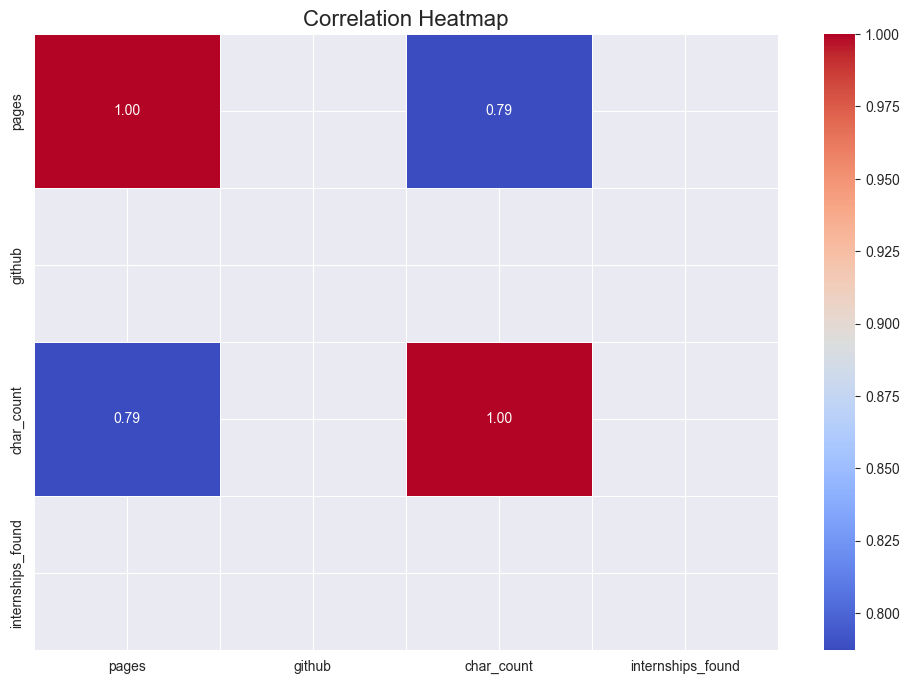

In [22]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))  # Set the figure size
correlation_matrix = numerical_df.corr()  # Compute the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
# Feature Engineering to handle multicolinearity




# Then remove the original instances